In [25]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import gc
tqdm.pandas()
gc.collect()

C:\Users\ricky\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


30410

In [26]:
%%time
df = pd.read_feather('../data/2021玉山人工智慧公開挑戰賽冬季賽訓練資料集.feather')
df = df.loc[df.dt>=12,:] #取最近一年即可
print(df.shape,df.isnull().sum().sum())
df.head()

(19786604, 53) 1509444
Wall time: 54.9 s


,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,...,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
13188928,12.0,10115966.0,15,1.0,9678.450445,1.0,0.0,0.0,0.0,1.00,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0
13188938,12.0,10115966.0,18,1.0,9624.614033,1.0,0.0,0.0,0.0,1.00,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0
13188944,12.0,10115966.0,25,1.0,2338.181448,1.0,0.0,0.0,0.0,1.00,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0
13188946,12.0,10115966.0,26,2.0,16627.150110,2.0,0.0,0.0,0.0,1.00,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0
13188957,12.0,10115966.0,37,13.0,18485.113446,3.0,10.0,0.0,0.0,0.27,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0


In [27]:
%%time
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
miss_table = missing_values_table(df)
miss_table

Your selected dataframe has 53 columns.
There are 9 columns that have missing values.
Wall time: 6.74 s


,Missing Values,% of Total Values
slam,1023527,5.2
gender_code,242749,1.2
age,242749,1.2
trdtp,365,0.0
educd,14,0.0
masts,10,0.0
naty,10,0.0
poscd,10,0.0
cuorg,10,0.0


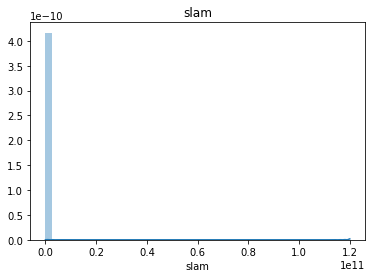

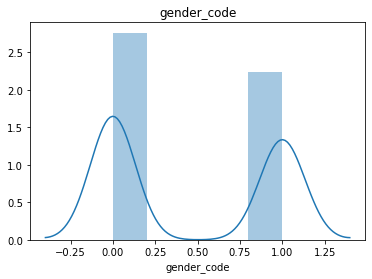

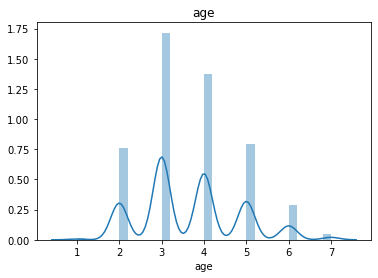

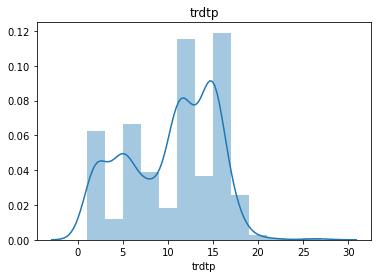

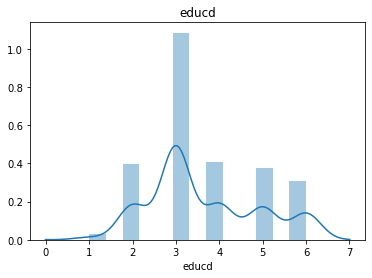

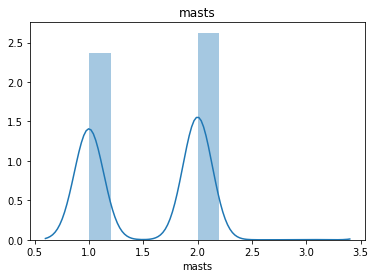

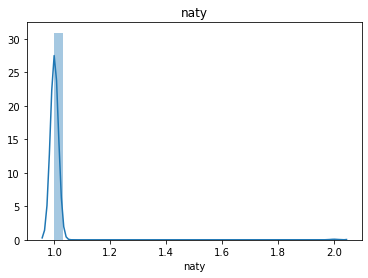

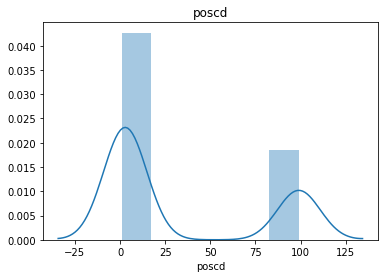

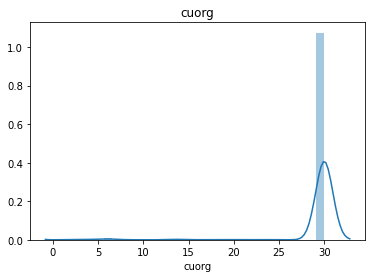

In [28]:
import seaborn as sns
for c in miss_table.index:
    sns.distplot(df[c].sample(1000))
    plt.title(c)
    plt.show()

In [29]:
df[miss_table.index].describe().T[['mean','50%','min','max']]

,mean,50%,min,max
slam,1.124233e+126,79291.240239,8019.906666,7.031358e+132
gender_code,4.465746e-01,0.000000,0.000000,1.000000e+00
age,3.582282e+00,3.000000,1.000000,9.000000e+00
trdtp,1.023975e+01,11.000000,1.000000,2.900000e+01
educd,3.599292e+00,3.000000,1.000000,6.000000e+00
masts,1.540674e+00,2.000000,1.000000,3.000000e+00
naty,1.002250e+00,1.000000,1.000000,2.000000e+00
poscd,3.277224e+01,3.000000,1.000000,9.900000e+01
cuorg,2.951949e+01,30.000000,1.000000,4.000000e+01


由此可知如果slam用平均值其值為1.124233e+126(可能是受到離群值影響) 跟中位數的79291.240239差異非常大

而['gender_code','age','trdtp','educd','masts','naty','poscd','cuorg'] # 都是類別型可以用一個-999特殊數值來補值 之後再做one_hot